<a href="https://colab.research.google.com/github/Aravind-11/IITM_Saastra/blob/main/aerial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
# Stable Baselines only supports tensorflow 1.x for now
%tensorflow_version 1.x
!pip install stable-baselines[mpi]==2.10.0

TensorFlow 1.x selected.
     |████████████████████████████████| 248 kB 5.3 MB/s 
  Attempting uninstall: stable-baselines
    Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


In [ ]:
import numpy as np
import gym
from random import random 
class Football:  # The class encapsulating the environment
    '''
    Actions [0 : Stand, 1 : Up, 2 : Right, 3 : Down, 4 : Left]
    These are the representing no.s for the mentioned actions
    '''

    def __init__(self, length=30, width=30, goalPositions=[29,15]):
        
        # The player start at random locations
        
        self.pA=[0,15] 
        self.pO=[6,8]
            
        
        self.h = length   # Length of the Football Pitch    
        self.w = width    # Width of the Football Pitch
        
        self.goalPositions = np.array(goalPositions)   # This means that the middle 4 positions at the right and left are the goals
        
     
        
        self.reward = 0                            # Initially the reward is 0
        
        self.observation=np.random.rand(6,)
        self.done = bool(0)                          # This stores whether the game needs to be restart with new position (in the case of a goal)

    def reset(self):
        self.done = bool(0)
        self.reward = 0
        
        self.pA = np.array([np.random.randint(self.h), np.random.randint(self.h)])
        #self.pO=[6,8]
        self.x_traj,self.y_traj=[],[]
        return np.array((*self.pA,(15-self.pA[0]),(15-self.pA[1]),self.theta,*self.pO)).astype(np.float32)

    def step(self, action):
        if self.done == bool(1):
          self.reset()
        self.move(first, action)                   # We chose the first player at random
        if self.done == bool(1):
          return self.observation, self.reward, self.done
        if not done:
            self.current_player_num = (self.current_player_num + 1) % 2   
        return self.observation,self.reward, self.done,{}

    def move(self, player, action):
        opponent = 1 - player
        
        newPosition = self.pA + self.actionToMove(action)
        
        if self.ballOwner is player and self.isInGoal(*newPosition) >= 0:
            self.done = bool(1)
            return 1 - self.isInGoal(*newPosition)
        # If it's in the board
        elif self.isInBoard(*newPosition):
            self.positions[player] = newPosition
        if(self.ballOwner!=0):
          self.reward=-1
        return -1



    def isInBoard(self, x, y):
        if(x<0 or x>(30)):
          return 0
        if(y<0 or y>(30)):
          return 0 
        return 1
        

    #def choosePlayer(self):
    #    return np.random.randint(0, 2)
    def render(self,mode="human"):
        

        plt.cla()
        plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
        plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
        plot_vehicle(x, y, theta, x_traj, y_traj)

class modf_football(Football,gym.Env):
  def __init__(self, length=30, width=30, goalPositions=[29, 15]):
    super().__init__()
    self.observation_space=gym.spaces.Box(low=-30, high=60,
                                        shape=(7,), dtype=np.float32)
    self.reward=0
    self.action_space = gym.spaces.Box(
            low=-2*np.pi, high=2*np.pi, shape=(1,), dtype=np.float32
        )
    self.name='Football'
    self.current_player_num=0
    self.observation=np.random.rand(6,)
    self.pA = np.array([5,15])
    self.Kp_rho = 9
    self.dt=0.01
    self.Kp_alpha = 15
    self.Kp_beta = -3
    self.x_goal = 29
    self.y_goal = 15
    self.theta_goal = 0 
    self.theta_start = 2 * np.pi * random() - np.pi
    
    self.theta = self.theta_start

    self.x_diff = self.x_goal - self.pA[0]
    self.y_diff = self.y_goal - self.pA[1]

    self.x_traj, self.y_traj = [], []
    self.x_start=self.pA[0]
    self.y_start=self.pA[1]
    self.rho = np.hypot(self.x_diff, self.y_diff)
  #modifying the step and move function to get the updated reward system
  def step(self, action):
        
        #print('action',action)
        if self.done == bool(1):
          self.reset()
        
      
        self.move(action)                   # We chose the first player at random
        if self.done == bool(1):
          return self.observation, self.reward, self.done,{}
                   
        return self.observation,self.reward, self.done,{}
  
  def move(self, action):
        self.x_diff = self.x_goal - self.pA[0]
        self.y_diff = self.y_goal - self.pA[1]
        self.rho=np.hypot(self.x_diff,self.y_diff)
        v = self.Kp_rho * self.rho
        #v=9
        #w = self.Kp_alpha * action[0] + self.Kp_beta * action[1]
        #if action[0] > np.pi / 2 or action[0] < -np.pi / 2:
        #    v = -v
        #elif (self.pA[0]==0 and self.pA[1]==29) or (self.pA[1]==0 and self.pA[0]==29):
        #  v=-v
        self.theta = action
        x = self.pA[0] +  v* np.cos(action) * self.dt
        y = self.pA[1] +  v* np.sin(action) * self.dt
        newPosition = np.array([x,y])
        self.x_traj.append(x)
        self.y_traj.append(y)
        
        if (self.pO[0]>self.pA[0]):
          self.pO[0]-=1
        elif (self.pO[0]<self.pA[0]):
          self.pO[0]+=1
        if (self.pO[1]>self.pA[1]):
          self.pO[1]-=1
        elif (self.pO[1]<self.pA[1]):
          self.pO[1]+=1
        
        self.pO[0]=max(self.pO[0],0)
        self.pO[0]=min(self.pO[0],29)
        self.pO[1]=max(self.pO[1],0)
        self.pO[1]=min(self.pO[1],29)
        

        if self.isInGoal(*newPosition) >= 0:
            
            self.done = bool(1)
            return 1 - self.isInGoal(*newPosition)
        # If it's in the board
        if self.isInBoard(*newPosition):
               
            self.reward = -0.1 * ((abs((self.pA[0]-self.goalPositions[0])))+(abs(self.pA[1]-self.goalPositions[1]))) #- 0.01*(abs(newPosition[0]-self.pO[0])+abs(newPosition[1]-self.pO[1])) -0.01*(abs(newPosition[0]-5)+abs(newPosition[1]-17))
            self.pA = newPosition

        
        self.observation=np.array((*self.pA,(15-self.pA[0]),(15-self.pA[1]),self.theta,*self.pO)).astype(np.float32)
        return -1
  def isInGoal(self, x, y):
     x_diff = self.x_goal - x
     y_diff = self.y_goal - y
     rho = np.hypot(x_diff, y_diff)
     if(rho<0.001):
       self.done=bool(1)
       self.reward=20  
     return -1
  def transformation_matrix(self,x, y, theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), x],
        [np.sin(theta), np.cos(theta), y],
        [0, 0, 1]
    ])
  def plot_vehicle(self,x, y, theta, x_traj, y_traj):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T = self.transformation_matrix(x, y, theta)
    p1 = np.matmul(T, p1_i)
    p2 = np.matmul(T, p2_i)
    p3 = np.matmul(T, p3_i)
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')
    plt.style.use('seaborn')
    plt.scatter([5,6,10,15],[17,8,10,12],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
    plt.style.use('seaborn')
    plt.scatter([18],[15],s=100,c='red',edgecolor='black',linewidth=2,alpha=0.75)   
    plt.plot(x_traj, y_traj, 'b--')
    #circle1 = plt.Circle((0, 0), 0.2, color='r')
    #fig, ax = plt.subplots()
    
    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect('key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
    
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    
    plt.pause(self.dt)
  def render(self,mode="human"):
        

        plt.cla()
        plt.arrow(self.x_start, self.y_start, np.cos(self.theta_start),
                      np.sin(self.theta_start), color='r', width=0.1)
        plt.arrow(self.x_goal, self.y_goal, np.cos(self.theta_goal),
                      np.sin(self.theta_goal), color='g', width=0.1)
        self.plot_vehicle(self.pA[0], self.pA[1], self.theta, self.x_traj, self.y_traj)
  def seed():
      return 0 
  def metadata(x):
      return 0 
  def legal_actions(self):
    return gym.spaces.Discrete(5)
  def close(self):
    pass

env=modf_football(Football,gym.Env)

In [ ]:
from stable_baselines.common.env_checker import check_env

check_env(env, warn=True)

/usr/local/lib/python3.7/dist-packages/stable_baselines/common/env_checker.py:210: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn("We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
from stable_baselines import DQN, PPO2, A2C, ACKTR
from stable_baselines.common.cmd_util import make_vec_env

env = make_vec_env(lambda: env, n_envs=1)

In [ ]:
model = PPO2('MlpPolicy', env, verbose=1).learn(50000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Streaming output truncated to the last 5000 lines.
| n_updates          | 6             |
| policy_entropy     | 1.4185286     |
| policy_loss        | 0.00032358116 |
| serial_timesteps   | 768           |
| time_elapsed       | 1.37          |
| total_timesteps    | 768           |
| value_loss         | 4.744176      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0006807196 |
| clipfrac           | 0.0          |
| explained_variance | 0.0483       |
| fps                | 830          |
| n_updates          | 7            |
| policy_entropy     | 1.419827     |
| policy_loss        | 0.0013436013 |
| serial_timesteps   | 896          |
| time_elapsed       | 1.52         |
| total_timesteps    | 896          |
| value_loss         | 1.9212568    |
-------------------------------------
---------------------------------------
| approxkl           | 3.0782736e-05  |
| clipfrac           | 0.0            |
| explained_variance | 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 1
Action:  [[-0.5592599]]
obs= [[  2.4244807  26.482471   12.57552   -11.482471   -0.5592599  28.
   17.       ]] reward= [-4.2] done= [False]


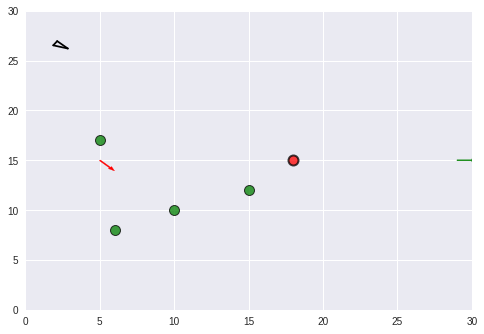

Step 2
Action:  [[-0.6265392]]
obs= [[ 4.5351    24.954748  10.4649    -9.954748  -0.6265392 27.
  18.       ]] reward= [-3.8057992] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


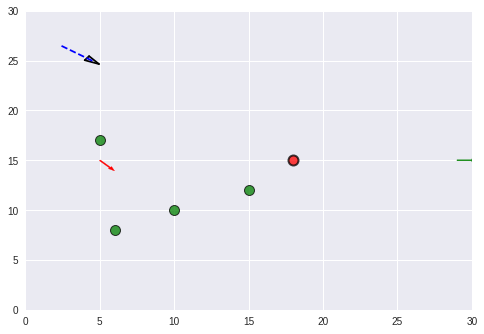

Step 3
Action:  [[-0.67232746]]
obs= [[ 6.3949122  23.474245    8.605087   -8.474245   -0.67232746 26.
  19.        ]] reward= [-3.4419649] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


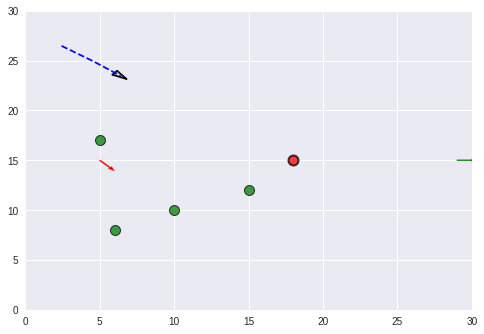

Step 4
Action:  [[-0.7185478]]
obs= [[ 8.030453  22.043962   6.9695473 -7.0439625 -0.7185478 25.
  20.       ]] reward= [-3.1079333] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


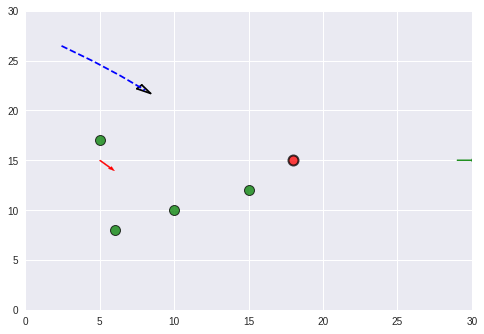

Step 5
Action:  [[-0.75258327]]
obs= [[ 9.483655   20.683136    5.516345   -5.683136   -0.75258327 24.
  21.        ]] reward= [-2.801351] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


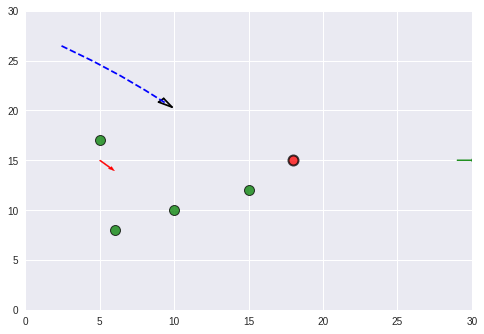

Step 6
Action:  [[-0.7697075]]
obs= [[10.797393  19.409992   4.202607  -4.409992  -0.7697075 23.
  20.       ]] reward= [-2.5199482] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


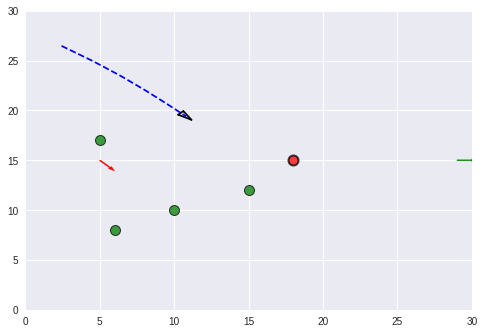

Step 7
Action:  [[-0.7567001]]
obs= [[12.023022  18.252766   2.9769783 -3.2527657 -0.7567001 22.
  19.       ]] reward= [-2.2612598] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


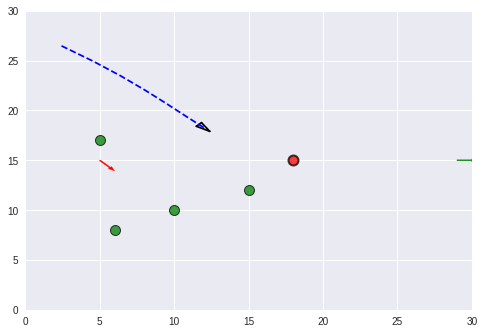

Step 8
Action:  [[-0.7480656]]
obs= [[13.163374  17.19453    1.836626  -2.1945305 -0.7480656 21.
  18.       ]] reward= [-2.0229745] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


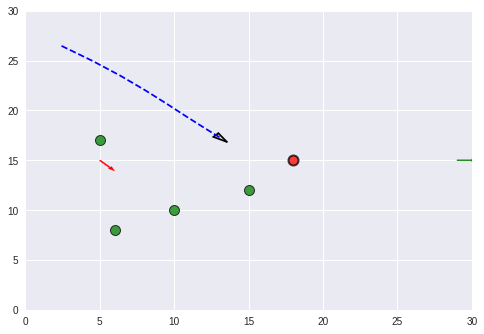

Step 9
Action:  [[-0.75570863]]
obs= [[14.210596   16.207716    0.7894039  -1.207716   -0.75570863 20.
  17.        ]] reward= [-1.8031157] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


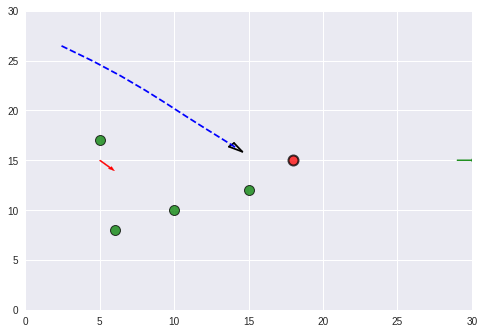

Step 10
Action:  [[-0.7516935]]
obs= [[15.186207   15.29575    -0.18620682 -0.29574966 -0.7516935  19.
  16.        ]] reward= [-1.599712] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


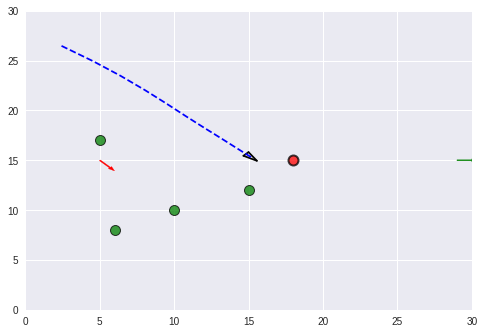

Step 11
Action:  [[-0.7221737]]
obs= [[16.119312   14.473758   -1.1193123   0.52624226 -0.7221737  18.
  15.        ]] reward= [-1.4109544] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


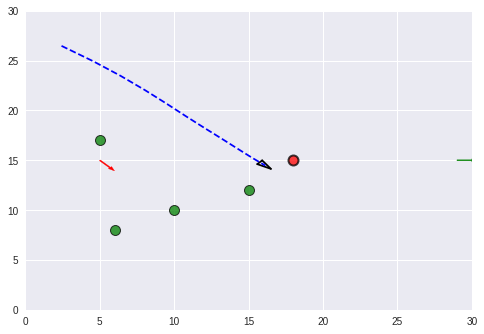

Step 12
Action:  [[-0.65910697]]
obs= [[17.036518   13.763221   -2.036518    1.2367792  -0.65910697 17.
  14.        ]] reward= [-1.340693] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


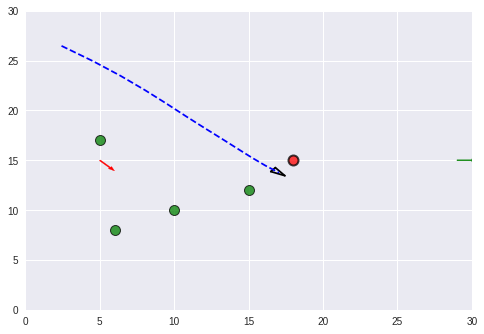

Step 13
Action:  [[-0.54121447]]
obs= [[17.96427    13.205566   -2.9642696   1.7944336  -0.54121447 18.
  13.        ]] reward= [-1.3200262] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


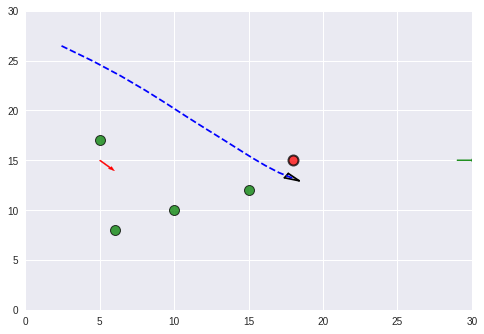

Step 14
Action:  [[-0.21656907]]
obs= [[18.947023   12.989341   -3.9470234   2.0106592  -0.21656907 17.
  14.        ]] reward= [-1.2830164] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


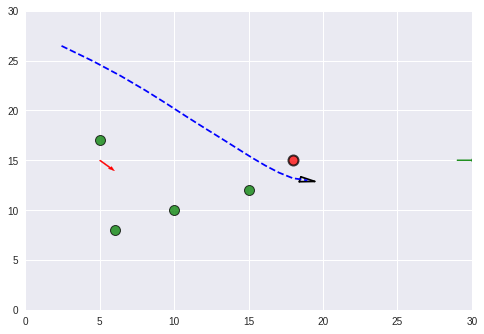

Step 15
Action:  [[-0.41913465]]
obs= [[19.789845   12.613834   -4.7898445   2.3861656  -0.41913465 18.
  13.        ]] reward= [-1.2063636] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


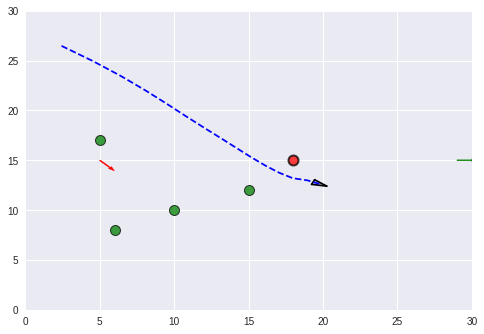

Step 16
Action:  [[-0.02615602]]
obs= [[20.645834   12.59144    -5.645834    2.4085598  -0.02615602 19.
  12.        ]] reward= [-1.1596321] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


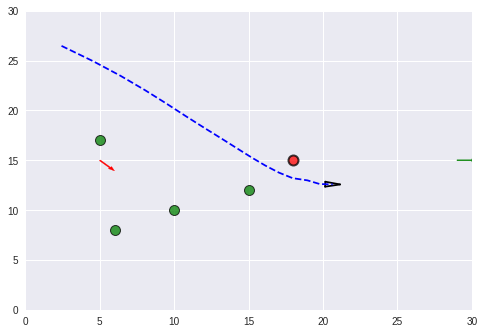

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 17
Action:  [[0.2574892]]
obs= [[21.402536  12.790707  -6.4025364  2.2092934  0.2574892 20.
  13.       ]] reward= [-1.0762726] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


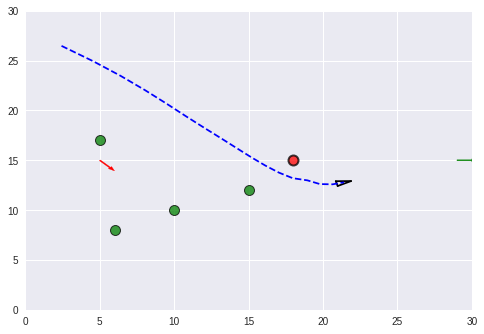

Step 18
Action:  [[0.07205062]]
obs= [[22.112783   12.8419695  -7.1127834   2.1580305   0.07205062 21.
  12.        ]] reward= [-0.9806757] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


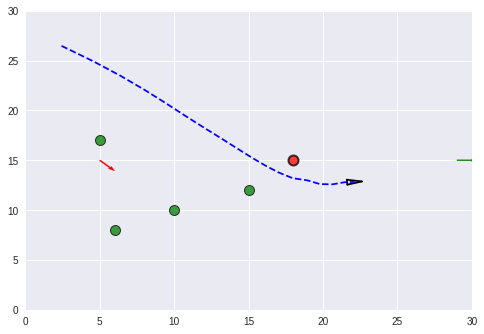

Step 19
Action:  [[0.42898348]]
obs= [[22.703491   13.112154   -7.703491    1.887846    0.42898348 22.
  13.        ]] reward= [-0.90452474] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


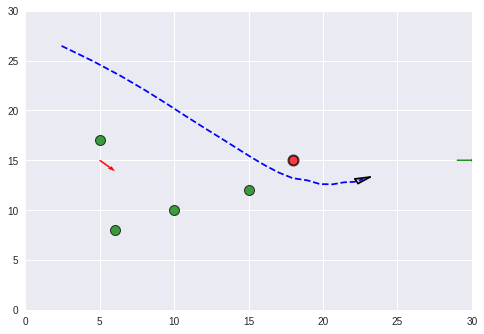

Step 20
Action:  [[0.2089944]]
obs= [[23.282227  13.234899  -8.282227   1.7651014  0.2089944 23.
  14.       ]] reward= [-0.8184355] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


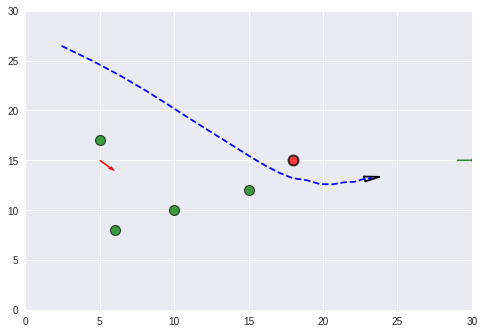

Step 21
Action:  [[0.1272956]]
obs= [[23.816431  13.30327   -8.816431   1.6967297  0.1272956 24.
  13.       ]] reward= [-0.7482875] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


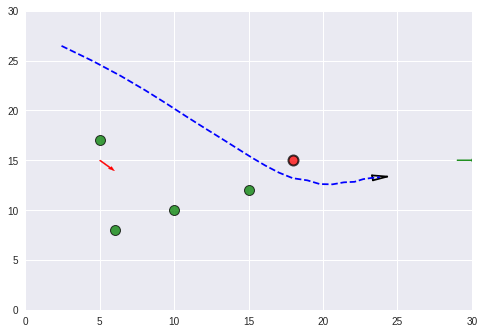

Step 22
Action:  [[0.47998735]]
obs= [[24.25184    13.529942   -9.251841    1.4700584   0.47998735 23.
  14.        ]] reward= [-0.6880299] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


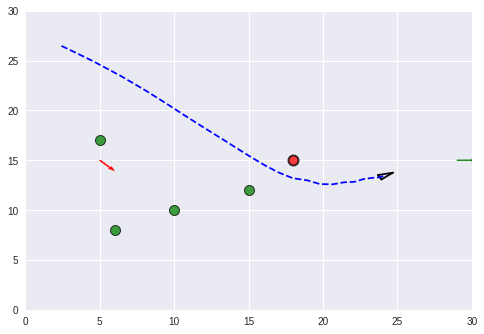

Step 23
Action:  [[-0.06626618]]
obs= [[24.698206   13.5003195  -9.698206    1.4996805  -0.06626618 24.
  13.        ]] reward= [-0.6218218] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


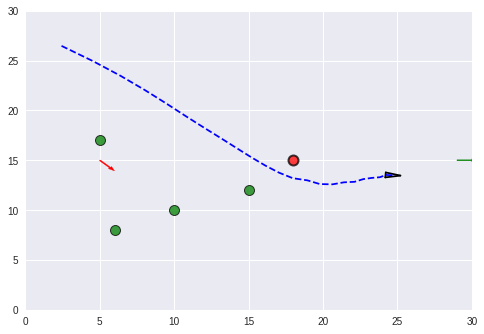

Step 24
Action:  [[0.44488165]]
obs= [[ 25.06831     13.676769   -10.06831      1.3232307    0.44488165
   25.          14.        ]] reward= [-0.58014745] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


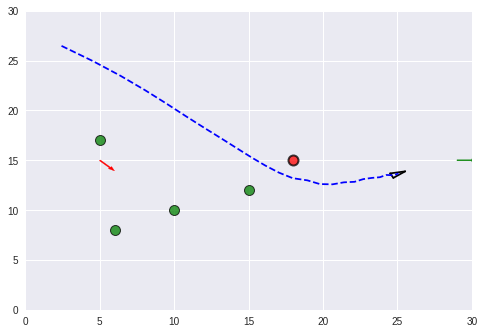

Step 25
Action:  [[0.2143585]]
obs= [[ 25.43312    13.756189  -10.433121    1.2438107   0.2143585  26.
   13.       ]] reward= [-0.52549213] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


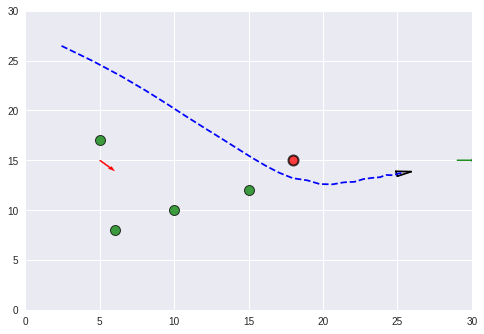

Step 26
Action:  [[0.56789327]]
obs= [[ 25.719734    13.939049   -10.719734     1.0609512    0.56789327
   25.          14.        ]] reward= [-0.481069] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


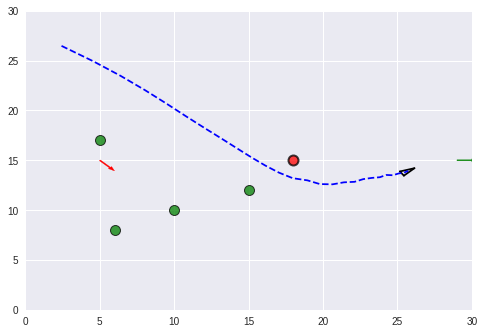

Step 27
Action:  [[0.05320622]]
obs= [[ 26.029577    13.95555    -11.029577     1.0444498    0.05320622
   26.          13.        ]] reward= [-0.4341217] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


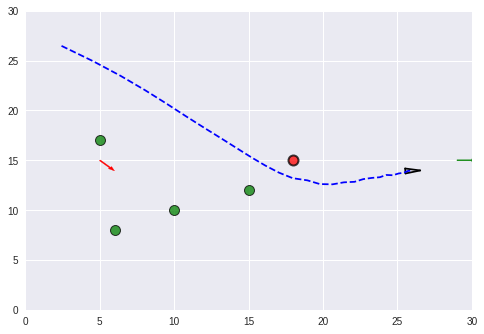

Step 28
Action:  [[0.5309]]
obs= [[ 26.273952    14.09903    -11.2739525    0.90097046   0.5309
   27.          14.        ]] reward= [-0.40148726] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


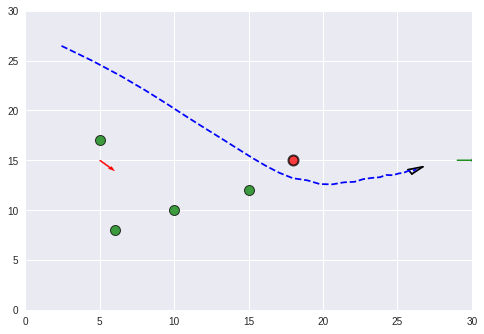

Step 29
Action:  [[0.32283485]]
obs= [[ 26.519001    14.181007   -11.519001     0.8189926    0.32283485
   26.          15.        ]] reward= [-0.3627018] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


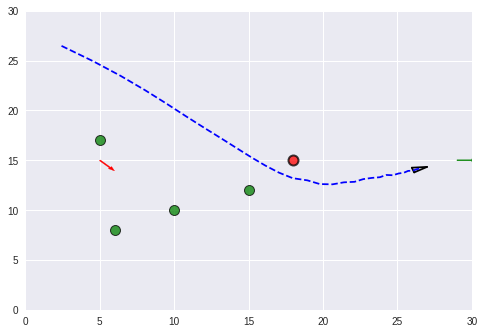

Step 30
Action:  [[-0.09315984]]
obs= [[ 26.753122    14.159133   -11.753122     0.84086704  -0.09315984
   27.          14.        ]] reward= [-0.32999918] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


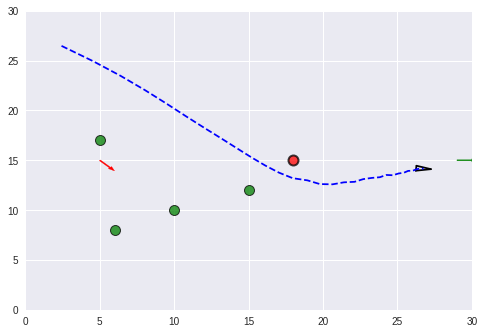

Step 31
Action:  [[0.42264932]]
obs= [[ 26.950039    14.247697   -11.950039     0.7523031    0.42264932
   26.          15.        ]] reward= [-0.30877447] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


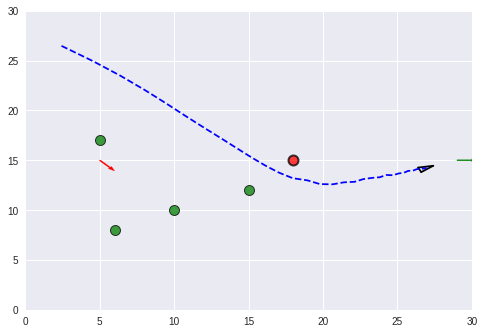

Step 32
Action:  [[-0.14994973]]
obs= [[ 27.144361    14.218338   -12.1443615    0.781662    -0.14994973
   27.          14.        ]] reward= [-0.28022644] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


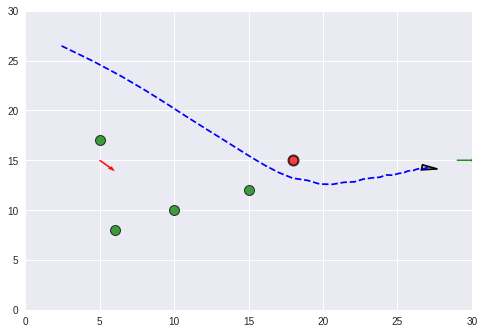

Step 33
Action:  [[0.41572794]]
obs= [[ 27.310144    14.291525   -12.310144     0.7084751    0.41572794
   28.          15.        ]] reward= [-0.26373005] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


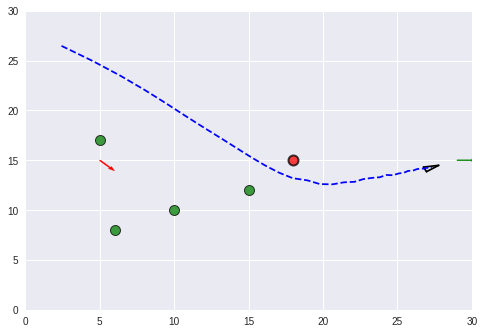

Step 34
Action:  [[0.20323467]]
obs= [[ 27.471663    14.324811   -12.4716625    0.675189     0.20323467
   27.          14.        ]] reward= [-0.23983307] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


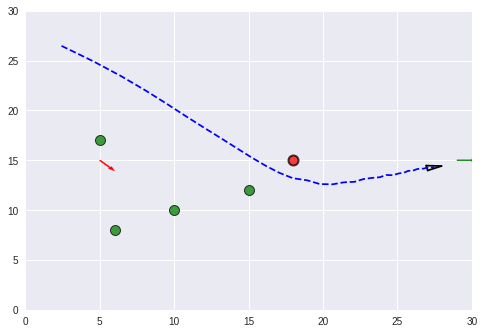

Step 35
Action:  [[0.29844007]]
obs= [[ 27.61539     14.369026   -12.615391     0.6309738    0.29844007
   28.          15.        ]] reward= [-0.22035265] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


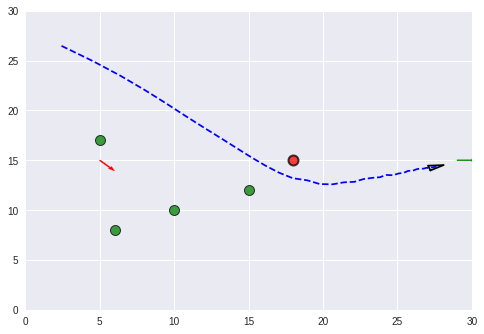

Step 36
Action:  [[0.18849555]]
obs= [[ 27.749908    14.394687   -12.749908     0.6053133    0.18849555
   27.          14.        ]] reward= [-0.2015583] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


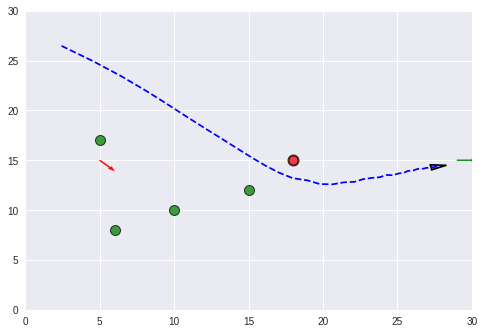

Step 37
Action:  [[0.26892447]]
obs= [[ 27.870419    14.427899   -12.870419     0.57210064   0.26892447
   28.          15.        ]] reward= [-0.18554048] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


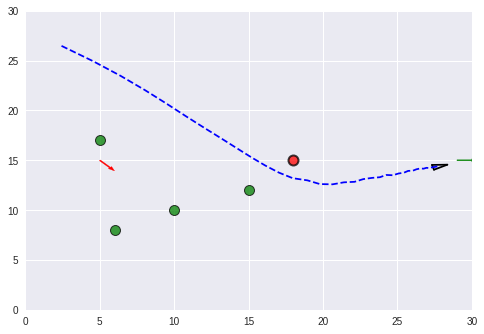

Step 38
Action:  [[0.16512643]]
obs= [[ 27.982826    14.446631   -12.982826     0.55336857   0.16512643
   27.          14.        ]] reward= [-0.1701682] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


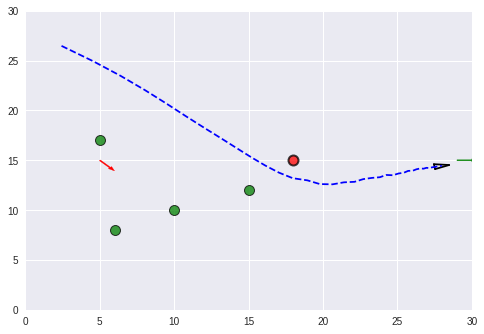

Step 39
Action:  [[0.24950764]]
obs= [[ 28.083815    14.472365   -13.083815     0.5276346    0.24950764
   28.          15.        ]] reward= [-0.15705423] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


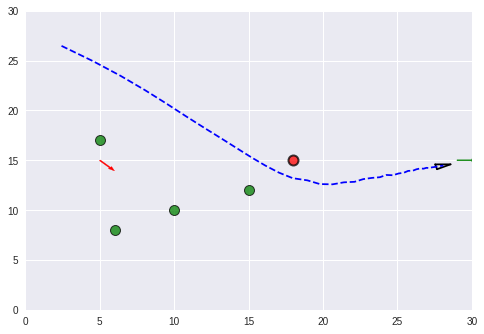

Step 40
Action:  [[0.14695463]]
obs= [[ 28.177942    14.486299   -13.177942     0.51370144   0.14695463
   29.          14.        ]] reward= [-0.144382] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


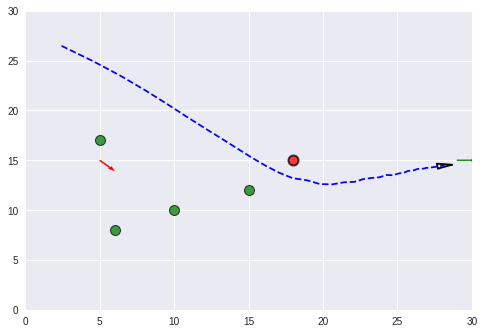

Step 41
Action:  [[0.5339002]]
obs= [[ 28.253044    14.530696   -13.253044     0.46930408   0.5339002
   28.          15.        ]] reward= [-0.13357592] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


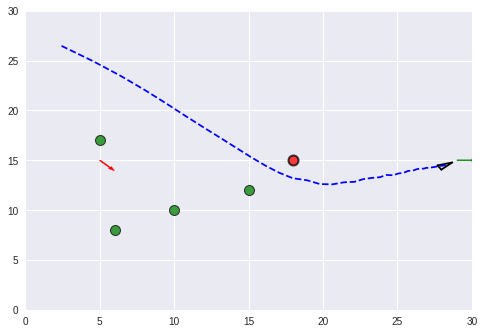

Step 42
Action:  [[0.05224034]]
obs= [[ 28.332329    14.534842   -13.332329     0.46515846   0.05224034
   29.          14.        ]] reward= [-0.121626] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


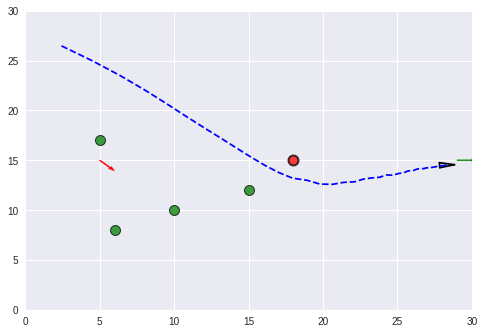

Step 43
Action:  [[0.5356201]]
obs= [[ 28.395308   14.572219  -13.395308    0.4277811   0.5356201  28.
   15.       ]] reward= [-0.11328297] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


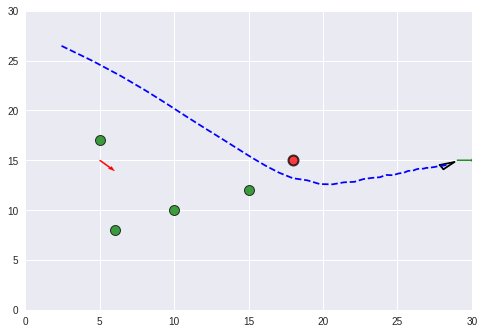

Step 44
Action:  [[0.02834537]]
obs= [[ 2.8461945e+01  1.4574108e+01 -1.3461945e+01  4.2589188e-01
   2.8345373e-02  2.9000000e+01  1.4000000e+01]] reward= [-0.10324736] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


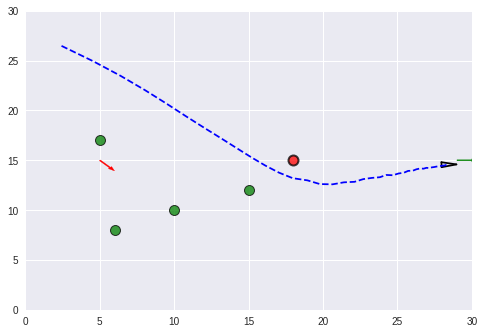

Step 45
Action:  [[0.52743316]]
obs= [[ 28.51531     14.605192   -13.51531      0.39480782   0.52743316
   28.          15.        ]] reward= [-0.09639473] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


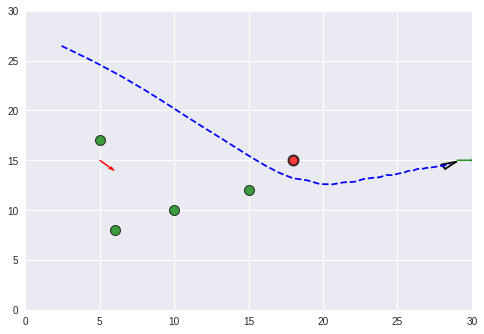

Step 46
Action:  [[0.01148744]]
obs= [[ 2.8571569e+01  1.4605839e+01 -1.3571569e+01  3.9416122e-01
   1.1487439e-02  2.9000000e+01  1.4000000e+01]] reward= [-0.08794975] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


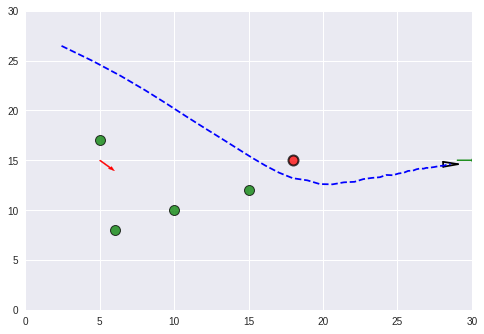

Step 47
Action:  [[0.52023673]]
obs= [[ 28.617033    14.631884   -13.617033     0.36811638   0.52023673
   28.          15.        ]] reward= [-0.08225918] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


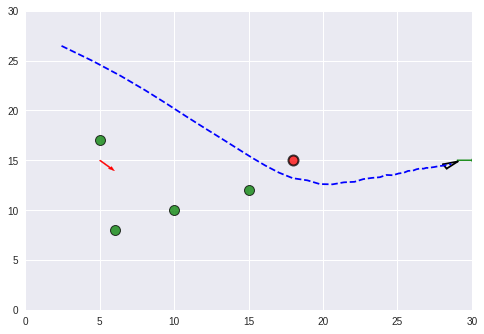

Step 48
Action:  [[-0.00199503]]
obs= [[ 2.8664841e+01  1.4631788e+01 -1.3664841e+01  3.6821175e-01
  -1.9950273e-03  2.9000000e+01  1.4000000e+01]] reward= [-0.07510834] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


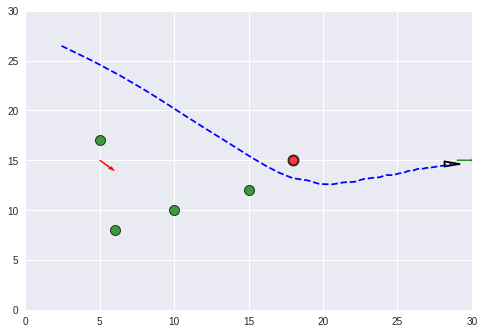

Step 49
Action:  [[0.51419884]]
obs= [[ 28.703857    14.653829   -13.703857     0.34617138   0.51419884
   28.          15.        ]] reward= [-0.07033711] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


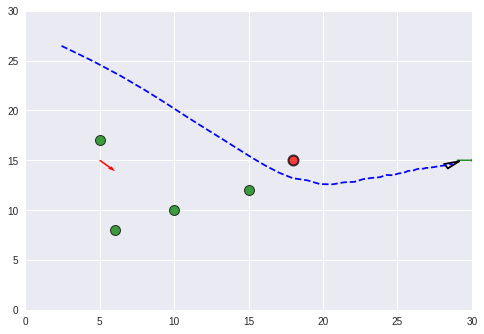

Step 50
Action:  [[-0.01300777]]
obs= [[ 2.87448540e+01  1.46532955e+01 -1.37448540e+01  3.46704483e-01
  -1.30077712e-02  2.90000000e+01  1.40000000e+01]] reward= [-0.0642314] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


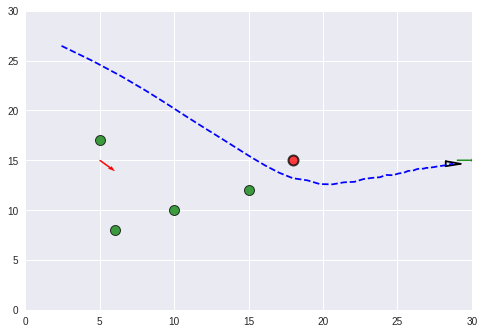

Step 51
Action:  [[0.5090958]]
obs= [[ 28.778683    14.672178   -13.778683     0.32782173   0.5090958
   28.          15.        ]] reward= [-0.06018505] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


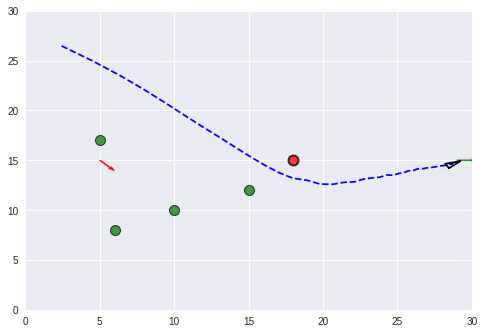

Step 52
Action:  [[-0.02216173]]
obs= [[ 2.8814272e+01  1.4671390e+01 -1.3814272e+01  3.2861042e-01
  -2.2161730e-02  2.9000000e+01  1.4000000e+01]] reward= [-0.0549139] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


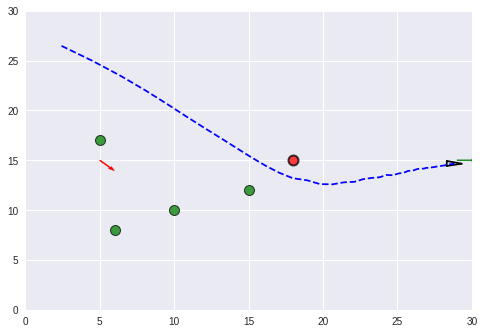

Step 53
Action:  [[0.5047352]]
obs= [[ 28.844007    14.687818   -13.8440075    0.31218243   0.5047352
   28.          15.        ]] reward= [-0.05143385] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


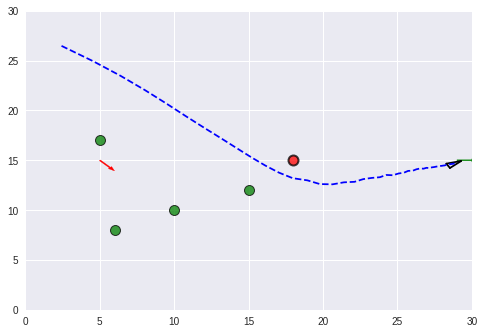

Step 54
Action:  [[-0.02992453]]
obs= [[ 28.875402    14.686878   -13.875402     0.3131218   -0.02992453
   29.          14.        ]] reward= [-0.04681749] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


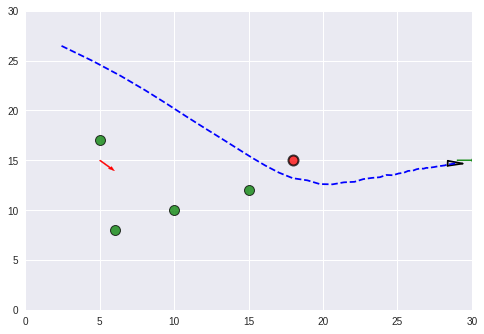

Step 55
Action:  [[0.50095606]]
obs= [[ 28.902006    14.701445   -13.902006     0.29855537   0.50095606
   28.          15.        ]] reward= [-0.04377193] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


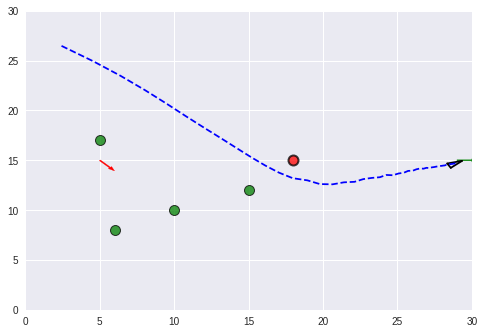

Step 56
Action:  [[-0.03666257]]
obs= [[ 28.930267    14.700408   -13.930267     0.29959202  -0.03666257
   29.          14.        ]] reward= [-0.03965492] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


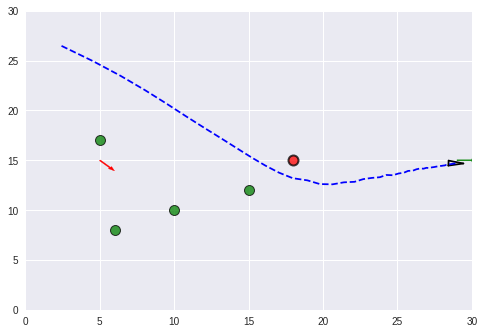

Step 57
Action:  [[0.4976254]]
obs= [[ 28.954594    14.713623   -13.954594     0.28637695   0.4976254
   28.          15.        ]] reward= [-0.03693247] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


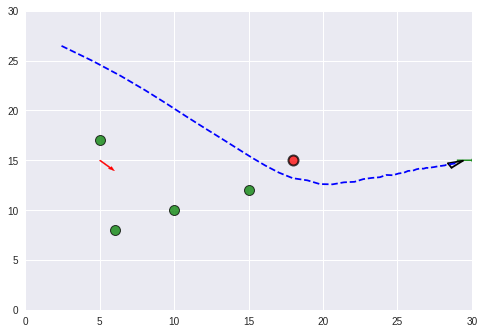

Step 58
Action:  [[-0.04266975]]
obs= [[ 28.980665    14.71251    -13.980665     0.2874899   -0.04266975
   29.          14.        ]] reward= [-0.03317833] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


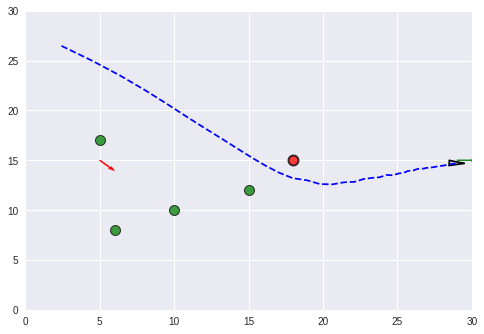

Step 59
Action:  [[0.49462795]]
obs= [[ 29.00349     14.72482    -14.00349      0.27517986   0.49462795
   28.          15.        ]] reward= [-0.03068247] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


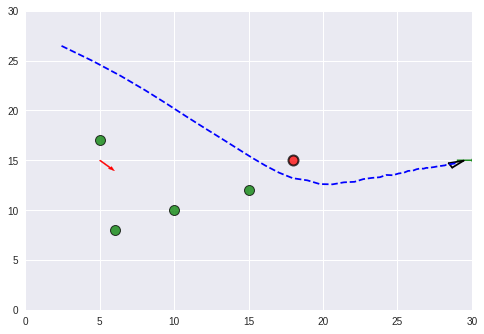

Step 60
Action:  [[-0.04818543]]
obs= [[ 29.02823     14.723627   -14.028231     0.2763729   -0.04818543
   29.          14.        ]] reward= [-0.02786703] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


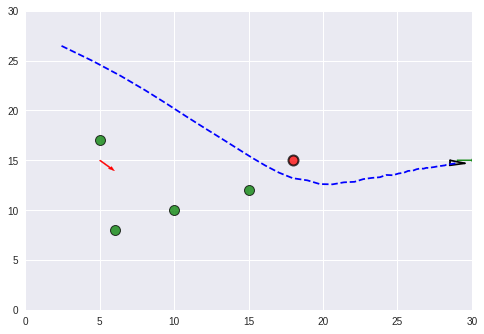

Step 61
Action:  [[0.4918667]]
obs= [[ 29.05027    14.7354355 -14.05027     0.2645645   0.4918667  29.
   15.       ]] reward= [-0.03046036] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


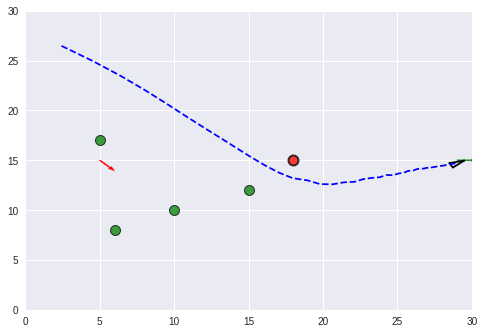

Step 62
Action:  [[0.13954125]]
obs= [[ 29.074272    14.738807   -14.074272     0.26119328   0.13954125
   29.          14.        ]] reward= [-0.03148346] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


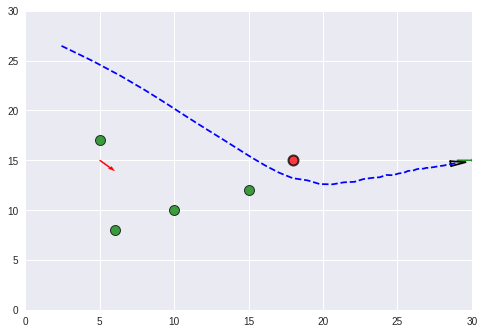

Step 63
Action:  [[0.4490413]]
obs= [[ 29.096289    14.749416   -14.096289     0.25058365   0.4490413
   29.          15.        ]] reward= [-0.03354654] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


KeyboardInterrupt: ignored

In [ ]:
obs = env.reset()
n_steps = 500
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  print("Step {}".format(step + 1))
  print("Action: ", action)
  obs, reward, done, info = env.step(action)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  env.render(mode='console')
  if done:
    # Note that the VecEnv resets automatically
    # when a done signal is encountered
    print("Goal reached!", "reward=", reward)
    break

Initial x: 15.22 m
Initial y: 9.86 m
Initial theta: -1.55 rad

Goal x: 19.00 m
Goal y: 15.00 m
Goal theta: 0.00 rad



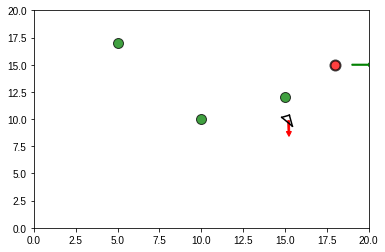

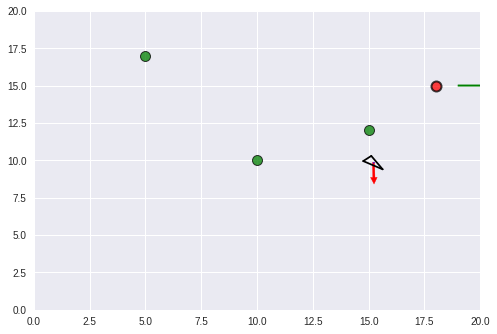

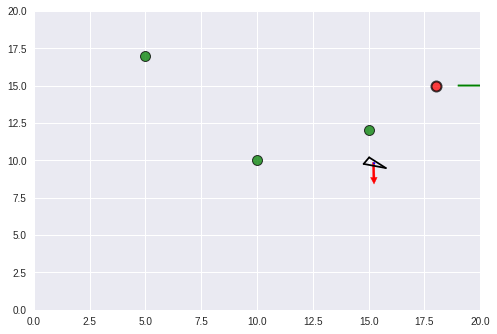

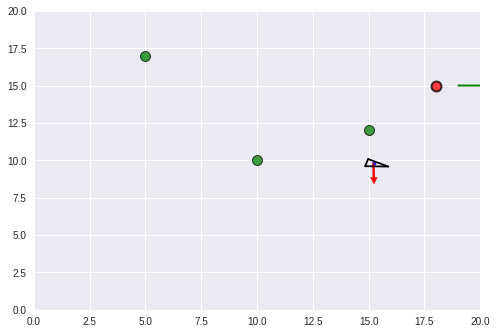

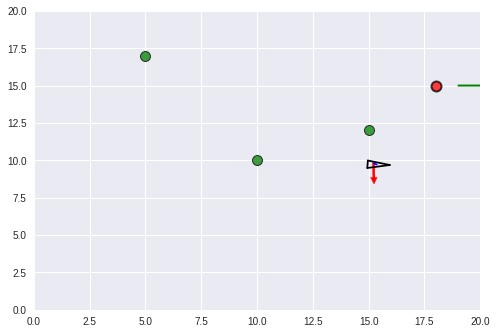

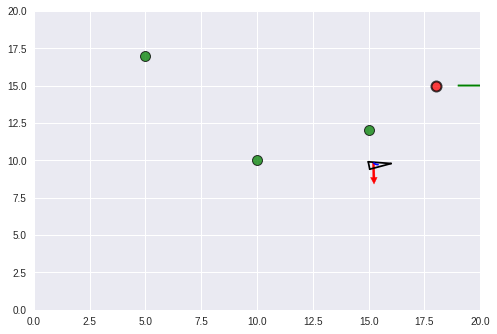

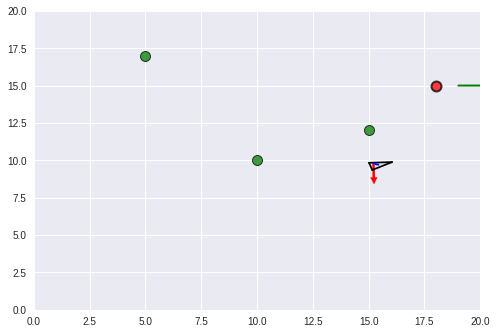

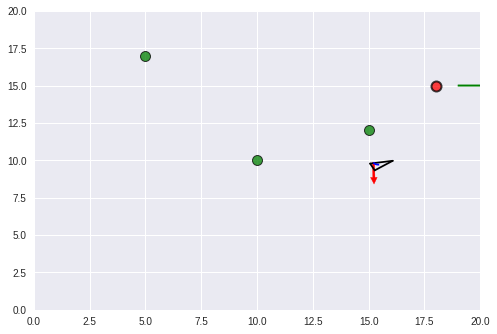

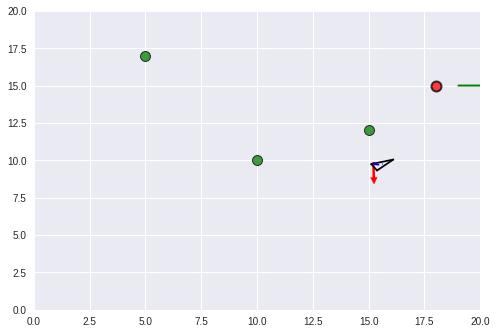

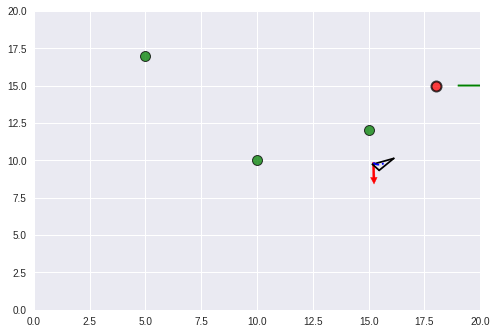

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

# simulation parameters
Kp_rho = 9
Kp_alpha = 15
Kp_beta = -3
dt = 0.01

show_animation = True


def move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal):
    """
    rho is the distance between the robot and the goal position
    alpha is the angle to the goal relative to the heading of the robot
    beta is the angle between the robot's position and the goal position plus the goal angle
    Kp_rho*rho and Kp_alpha*alpha drive the robot along a line towards the goal
    Kp_beta*beta rotates the line so that it is parallel to the goal angle
    """
    x = x_start
    y = y_start
    theta = theta_start

    x_diff = x_goal - x
    y_diff = y_goal - y

    x_traj, y_traj = [], []

    rho = np.hypot(x_diff, y_diff)
    while rho > 0.001:
        x_traj.append(x)
        y_traj.append(y)

        x_diff = x_goal - x
        y_diff = y_goal - y

        # Restrict alpha and beta (angle differences) to the range
        # [-pi, pi] to prevent unstable behavior e.g. difference going
        # from 0 rad to 2*pi rad with slight turn

        rho = np.hypot(x_diff, y_diff) # calculates hypotenuse of x_diff and y_diff. ## reward is also a function of rho 
        alpha = (np.arctan2(y_diff, x_diff) 
                    - theta + np.pi) % (2 * np.pi) - np.pi ## approximated by nn , reward is a function of true value of alpha 
        #alpha=0.1
        #beta=0.2     
        beta = (theta_goal - theta - alpha + np.pi) % (2 * np.pi) - np.pi ## approximated by nn , reward is a function of true value of beta 

        v = Kp_rho * rho
        w = Kp_alpha * alpha + Kp_beta * beta

        if alpha > np.pi / 2 or alpha < -np.pi / 2:
            v = -v

        theta = theta + w * dt
        x = x + 6 * np.cos(theta) * dt
        y = y + 6 * np.sin(theta) * dt

        if show_animation:  # pragma: no cover
            plt.cla()
            plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
            plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
            plot_vehicle(x, y, theta, x_traj, y_traj)


def plot_vehicle(x, y, theta, x_traj, y_traj):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T = transformation_matrix(x, y, theta)
    p1 = np.matmul(T, p1_i)
    p2 = np.matmul(T, p2_i)
    p3 = np.matmul(T, p3_i)
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')
    plt.style.use('seaborn')
    plt.scatter([5,10,15],[17,10,12],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
    plt.style.use('seaborn')
    plt.scatter([18],[15],s=100,c='red',edgecolor='black',linewidth=2,alpha=0.75)   
    plt.plot(x_traj, y_traj, 'b--')
    #circle1 = plt.Circle((0, 0), 0.2, color='r')
    #fig, ax = plt.subplots()
    
    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect('key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
    
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    
    plt.pause(dt)


def transformation_matrix(x, y, theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), x],
        [np.sin(theta), np.cos(theta), y],
        [0, 0, 1]
    ])


def main():

    for i in range(1):
        x_start = 20 * random()
        y_start = 20 * random()
        theta_start = 2 * np.pi * random() - np.pi
        x_goal = 19
        y_goal = 15
        theta_goal = 0 
        print("Initial x: %.2f m\nInitial y: %.2f m\nInitial theta: %.2f rad\n" %
              (x_start, y_start, theta_start))
        print("Goal x: %.2f m\nGoal y: %.2f m\nGoal theta: %.2f rad\n" %
              (x_goal, y_goal, theta_goal))
        move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal)


if __name__ == '__main__':
    main()

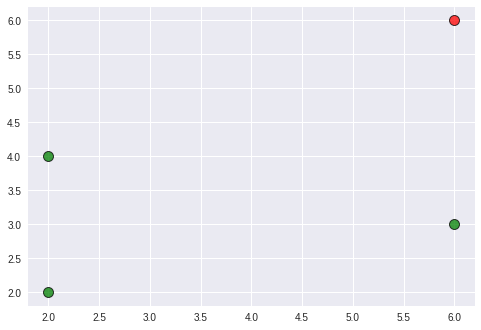

In [ ]:
plt.style.use('seaborn')
plt.scatter([2,3,6],[4,6,8],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
plt.style.use('seaborn')
plt.scatter([20],[15],s=100,c='red',edgecolor='black',linewidth=1,alpha=0.75) 
